# ARIMA / Autoregression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [60]:
df = pd.read_csv('../data/cryptocurrencypricehistory/coin_Cardano.csv')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df = df.set_index(pd.DatetimeIndex(df['Date'])).drop('Date', axis=1).drop('SNo', axis=1)
df.head()

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,
2017-10-02,Cardano,ADA,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
2017-10-03,Cardano,ADA,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2017-10-04,Cardano,ADA,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
2017-10-05,Cardano,ADA,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
2017-10-06,Cardano,ADA,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

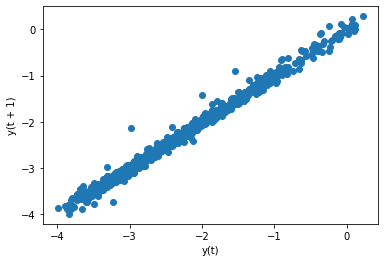

In [6]:
pd.plotting.lag_plot(np.log(df['Close']))

The correlation in the lag plot (lag 1) suggests that an autoregressive model is appropriate.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

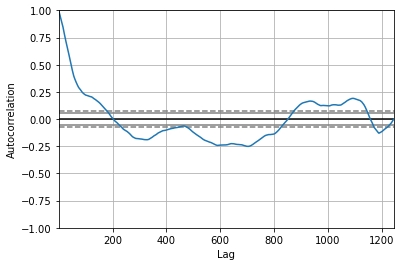

In [5]:
pd.plotting.autocorrelation_plot(np.log(df['Close']))

## Check Stationarity

In [111]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Close'].apply(np.log).values)
print('ADF-Statistic:',adf_test[0])
print('p-value:',adf_test[1])
print('Critical Values', adf_test[4])

ADF-Statistic: -2.128483247175606
p-value: 0.2332166300161242
Critical Values {'1%': -3.435699433298302, '5%': -2.863902271843875, '10%': -2.5680277086214076}


This suggests that the close price of ADA is not stationary.

## Autoregression

In [51]:
#X = df.drop('Close', axis=1).iloc[:,2:].apply(np.log).values
X = df['Close'].apply(np.log).values
forecast = 30
X_train, X_test = X[1:len(X)-forecast], X[len(X)-forecast:]

In [53]:
autoreg = AutoReg(X_train, lags=1)
autoreg_fit = autoreg.fit()
print('Coefficients:{}'.format(autoreg_fit.params))

Coefficients:[-0.00837354  0.995675  ]


In [54]:
X_hat = autoreg_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1,dynamic=False)
X_hat

array([-1.06472956, -1.06849814, -1.07225042, -1.07598648, -1.07970637,
       -1.08341018, -1.08709797, -1.09076981, -1.09442577, -1.09806591,
       -1.10169031, -1.10529904, -1.10889216, -1.11246974, -1.11603184,
       -1.11957854, -1.1231099 , -1.12662599, -1.13012687, -1.13361261,
       -1.13708327, -1.14053892, -1.14397963, -1.14740545, -1.15081646,
       -1.15421272, -1.15759428, -1.16096123, -1.16431361, -1.16765149])

In [55]:
X_test

array([-1.05517615, -1.0144033 , -1.06450757, -0.91122053, -0.85273608,
       -0.81780458, -0.8185939 , -0.62013156, -0.46539744, -0.41062157,
       -0.38197699, -0.35166446, -0.07222829, -0.07500235, -0.07732673,
       -0.09902579, -0.16438111, -0.14964692, -0.13816965, -0.115501  ,
       -0.08979501, -0.07510174,  0.11596624,  0.0957824 ,  0.09453787,
       -0.04634855,  0.05036666,  0.07614237,  0.21600243,  0.28130701])

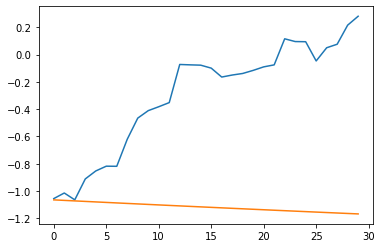

In [56]:
plt.plot(X_test)
plt.plot(X_hat)

## Vector Autoregression

In [91]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [92]:
X = df.drop('Volume', axis=1).iloc[:,2:].apply(np.log).values
forecast = 30
X_train, X_test = X[1:len(X)-forecast], X[len(X)-forecast:]

In [93]:
varmod = VAR(X_train, dates=df.index.values, freq='D')
varmod_fit = varmod.fit()
print('Coefficients:{}'.format(varmod_fit.params))

Coefficients:[[-8.35071863e-01 -1.30088076e+00 -1.47225971e-02 -1.82200807e+00
  -1.79210308e+00]
 [ 3.53201062e-01 -3.18078859e-01  1.98995652e-03  1.80310863e-01
   1.78764324e-01]
 [-3.38567101e-01  1.21195082e-01 -4.45723121e-03 -1.51943090e-01
  -1.50451521e-01]
 [-4.68524782e-02  3.48500891e-02  1.44267617e-02  3.01739943e-02
   2.93111091e-02]
 [ 9.94200056e-01  1.09645158e+00  9.87625092e-01  8.57321622e-01
  -1.40445223e-01]
 [ 3.49770143e-02  5.16622031e-02  6.21421276e-04  7.44177803e-02
   1.07319268e+00]]


In [98]:
yhat = varmod_fit.forecast(X_train, steps=30)
yhat

array([[-0.99397224, -1.12393785, -1.06173258, -1.05521369, 23.10574217],
       [-0.99679437, -1.12123359, -1.05480538, -1.04767365, 23.11330093],
       [-0.99127059, -1.11110899, -1.04727169, -1.04135764, 23.11964566],
       [-0.98659911, -1.1041234 , -1.04095535, -1.03578567, 23.12525274],
       [-0.9818744 , -1.09814348, -1.03537956, -1.03061994, 23.1304569 ],
       [-0.97717367, -1.09279443, -1.03021134, -1.02569241, 23.13542482],
       [-0.97249382, -1.08780179, -1.02528162, -1.02090745, 23.14025135],
       [-0.96783617, -1.08301764, -1.02049469, -1.01621203, 23.14498905],
       [-0.96320123, -1.07835944, -1.01579744, -1.01157664, 23.14966721],
       [-0.95858921, -1.0737813 , -1.01116027, -1.00698479, 23.15430218],
       [-0.95400018, -1.06925764, -1.00656669, -1.00242727, 23.15890308],
       [-0.94943411, -1.06477419, -1.00200748, -0.99789891, 23.16347506],
       [-0.94489091, -1.06032297, -0.99747743, -0.99339675, 23.16802103],
       [-0.94037048, -1.05589948, -0.9

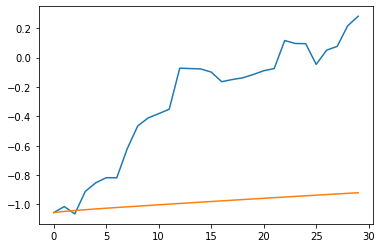

In [102]:
plt.plot(X_test[:,3])
plt.plot(yhat[:,3])

In [ ]:
Auto